In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate Affine Functions

In [37]:
def generate_affine_functions(num_functions):
    affine_functions = []
    for _ in range(num_functions):
        a = random.randint(-10, 10)
        b = random.randint(-10, 10)

        affine_functions.append({'slope': a, 'intercept': b})
    return affine_functions

In [42]:
num_functions = 3
affine_functions = generate_affine_functions(num_functions)

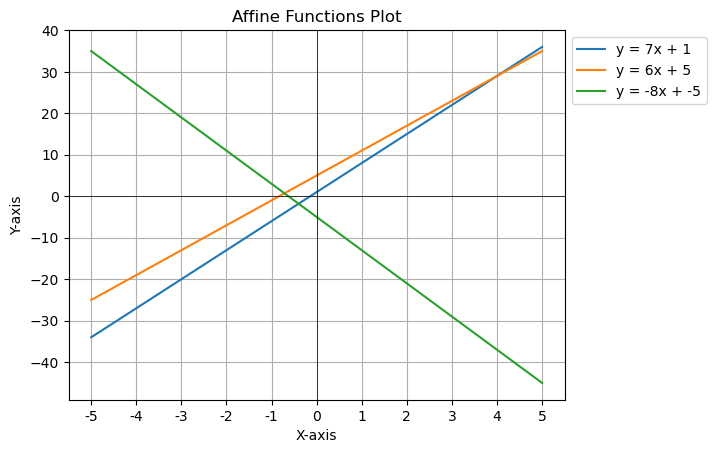

In [43]:
x = np.linspace(-5, 5, 100)
fig, ax = plt.subplots()
x_ticks = np.arange(-10, 10, 1)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_ticks)

for func in affine_functions:
    slope = func['slope']
    intercept = func['intercept']
    y = slope * x + intercept
    ax.plot(x, y, label=f'y = {slope}x + {intercept}')

ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Affine Functions Plot')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.show()

# 2. Sort functions based on slope ascending, intercept descending

In [44]:
def counting_sort(affine_functions):
    slope_values = [entry['slope'] for entry in affine_functions]
    intercept_values = [entry['intercept'] for entry in affine_functions]
    
    min_slope, max_slope = min(slope_values), max(slope_values)
    min_intercept, max_intercept = min(intercept_values), max(intercept_values)


    shift_slope = min_slope if min_slope < 0 else 0
    shift_intercept = min_intercept if min_intercept < 0 else 0

    count_slope = [0] * (max_slope - min_slope + 1)
    count_intercept = [0] * (max_intercept - min_intercept + 1)

    for entry in affine_functions:
        count_slope[entry['slope'] - shift_slope] += 1
        count_intercept[entry['intercept'] - shift_intercept] += 1

    for i in range(1, len(count_slope)):
        count_slope[i] += count_slope[i - 1]
        
    for i in range(1, len(count_intercept)):
        count_intercept[i] += count_intercept[i - 1]

    sorted_affine_functions_intercept = [None] * len(affine_functions)
    for entry in reversed(affine_functions):
        intercept_index = entry['intercept'] - shift_intercept
        sorted_affine_functions_intercept[count_intercept[intercept_index] - 1] = entry
        count_intercept[intercept_index] -= 1

    sorted_affine_functions = [None] * len(affine_functions)
    for entry in sorted_affine_functions_intercept:
        slope_index = entry['slope'] - shift_slope
        sorted_affine_functions[count_slope[slope_index] - 1] = entry
        count_slope[slope_index] -= 1

    return sorted_affine_functions

In [45]:
affine_functions = counting_sort(affine_functions)

# 3. finding min of maximums

The intersection point `t` is determined by solving the equation

$$ t = \frac{{r[\text{'intercept'}] - S[-1][0][\text{'intercept'}]}}{{S[-1][0][\text{'slope'}] - r[\text{'slope'}]}} $$

In [46]:
def minmax(affine_functions):

    if len(affine_functions) < 2:
        raise ValueError("At least two affine functions are required.")

    r1 = affine_functions[0]
    S = [(r1, 0)]
    
    for r in affine_functions[1:]:
        if S[-1][0]['slope'] == r['slope']:
            continue
        t = (r['intercept'] - S[-1][0]['intercept']) / (S[-1][0]['slope'] - r['slope'])
        
        while t < S[-1][1]:
            S.pop()
            if len(S) == 0:
                break
            
            t = (r['intercept'] - S[-1][0]['intercept']) / (S[-1][0]['slope'] - r['slope'])
            
        S.append((r,t))
        
    min_value = float('inf')
    min_point = (min_value, 0)
    for s in S:
        point_y = s[0]['slope'] * s[1] + s[0]['intercept']
        if point_y < min_value:
            min_value = point_y
            min_point = (min_value, s[1])

    return min_point[1]

In [47]:
result = minmax(affine_functions)
print(f'Minimum of Maximums at x = {result}')

Minimum of Maximums at x = -0.7142857142857143
